# <b>Investigating Fandango Movie Ratings</b><br/>

In this project we will study movie ratings in Fandango's web site rating sytem.<br/>
We would like to check if rating in this website is biased and the movies are over rated

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fandango_compare = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_1617 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_compare.info()
movie_ratings_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

# Equal chance for all movies?

Movies having less than 30 fan reviews on Fandango or without tickets on sale <br/> were not included in the samples. Therefore all movies do not have equal chance to <br/> be included in the study.

# The difference between Fandango and the other movie rating sites

Since we are dealing with dataframes containing data from several rating <br/>
site, we can compare these data to have a better idea about the difference <br/>
between Fandango and other sites.

In [3]:
# We can use describe() to have a first look
fandango_compare['Fandango_Ratingvalue'].describe()

count    146.000000
mean       3.845205
std        0.502831
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [4]:
fandango_compare['RT_user_norm'].describe()

count    146.000000
mean       3.193836
std        1.001222
min        1.000000
25%        2.500000
50%        3.325000
75%        4.050000
max        4.700000
Name: RT_user_norm, dtype: float64

In [5]:
fandango_compare['IMDB_norm'].describe()

count    146.000000
mean       3.368493
std        0.479368
min        2.000000
25%        3.150000
50%        3.450000
75%        3.700000
max        4.300000
Name: IMDB_norm, dtype: float64

In [6]:
fandango_compare['Metacritic_user_nom'].describe()

count    146.000000
mean       3.259589
std        0.755356
min        1.200000
25%        2.850000
50%        3.425000
75%        3.750000
max        4.800000
Name: Metacritic_user_nom, dtype: float64

In [7]:
# We can also use grouped frequency tables to have a better idea about diffrences 
# between Fandango and the other rating sites

rate_interval = pd.interval_range(start=0, end=5, freq=0.5)
Fandango_freq_table = fandango_compare['Fandango_Ratingvalue'].value_counts(bins=rate_interval).sort_index()
Fandango_freq_table

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     0
(1.5, 2.0]     0
(2.0, 2.5]     0
(2.5, 3.0]    13
(3.0, 3.5]    30
(3.5, 4.0]    41
(4.0, 4.5]    55
(4.5, 5.0]     7
Name: Fandango_Ratingvalue, dtype: int64

In [8]:
# Metacritics frequency table
Metacritics_freq_table = fandango_compare['Metacritic_user_nom'].value_counts(bins=rate_interval).sort_index()
Metacritics_freq_table

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     3
(1.5, 2.0]    11
(2.0, 2.5]    10
(2.5, 3.0]    22
(3.0, 3.5]    41
(3.5, 4.0]    40
(4.0, 4.5]    18
(4.5, 5.0]     1
Name: Metacritic_user_nom, dtype: int64

In [9]:
# Imdb frequency table 
Imdb_freq_table = fandango_compare['IMDB_norm'].value_counts(bins=rate_interval).sort_index()
Imdb_freq_table

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     0
(1.5, 2.0]     1
(2.0, 2.5]     8
(2.5, 3.0]    21
(3.0, 3.5]    52
(3.5, 4.0]    55
(4.0, 4.5]     9
(4.5, 5.0]     0
Name: IMDB_norm, dtype: int64

In [10]:
# Rotten Tomatoes frequency table 
RT_freq_table = fandango_compare['RT_norm_round'].value_counts(bins=rate_interval).sort_index()
RT_freq_table

(0.0, 0.5]    14
(0.5, 1.0]    10
(1.0, 1.5]    16
(1.5, 2.0]     4
(2.0, 2.5]    17
(2.5, 3.0]    13
(3.0, 3.5]    11
(3.5, 4.0]    15
(4.0, 4.5]    23
(4.5, 5.0]    23
Name: RT_norm_round, dtype: int64

These data show that only 13 movies are rated 3 and less in Fandango while the number of movies with rating inferior or equal to 3 are 30, 46 and 74 for imdb, metacritics and RT, respectively.

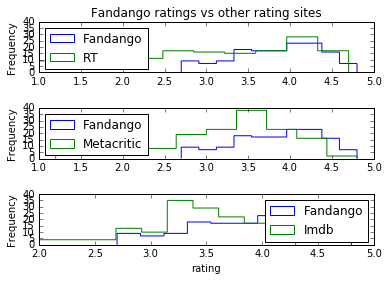

In [11]:
#We are going to visualize the difference between Fandango and the other rating
# sites using histograms 
plt.subplot(3,1,1)
fandango_compare['Fandango_Ratingvalue'].plot.hist(histtype='step', label = 'Fandango', legend = True)
fandango_compare['RT_user_norm'].plot.hist(histtype='step', label = 'RT', legend = True)
plt.ylim(0,40)
plt.title('Fandango ratings vs other rating sites')
plt.subplot(3,1,2) 
fandango_compare['Fandango_Ratingvalue'].plot.hist(histtype='step', label = 'Fandango', legend = True)
fandango_compare['Metacritic_user_nom'].plot.hist(histtype='step', label = 'Metacritic', legend = True)
plt.ylim(0,40)
plt.subplot(3,1,3)
fandango_compare['Fandango_Ratingvalue'].plot.hist(histtype='step', label = 'Fandango', legend = True)
fandango_compare['IMDB_norm'].plot.hist(histtype='step', label = 'Imdb', legend = True)
plt.ylim(0,40)
plt.xlabel('rating')
#plt.title('Fandango vs IMDB User Rating ')
plt.subplots_adjust(hspace=0.7)
plt.show()

* These plot shows a clear difference between user user votes in Fandango and the other movie rating sites. Fandango's rating are higher than the other sites.<br/>
* Since we analysed the user rating, these data show that the difference in rating existed between Fandango and other rating sites before the rounding operation.

 # Checking the changes in Fandango's rating in 2016

In [12]:
# First We are going to idolate movies released in 2015 and 2016.
# We are going to extract the year of release and create the 'year' column
fandango_compare['year'] = fandango_compare['FILM'].apply(lambda x: int(x.split("(")[1].replace(")","")))
fandango_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 23 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [13]:
#We are going to isolate movies released in 2015
fandango_compare_2015 = fandango_compare[fandango_compare['year'] == 2015]
#We are going to isolate movies released in 2016
fandango_compare_2016 = movie_ratings_1617[movie_ratings_1617['year']==2016]

In [14]:
# We use grouped frequency tables to see the diffrences between fandango ratings
# in 2015 and 2016
fandango_2015=fandango_compare_2015['Fandango_Ratingvalue'].value_counts(bins = rate_interval).sort_index()
fandango_2015

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     0
(1.5, 2.0]     0
(2.0, 2.5]     0
(2.5, 3.0]    12
(3.0, 3.5]    24
(3.5, 4.0]    39
(4.0, 4.5]    49
(4.5, 5.0]     5
Name: Fandango_Ratingvalue, dtype: int64

In [15]:
fandango_2016 = fandango_compare_2016['fandango'].value_counts(bins=rate_interval).sort_index()
fandango_2016

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     0
(1.5, 2.0]     0
(2.0, 2.5]     6
(2.5, 3.0]    14
(3.0, 3.5]    46
(3.5, 4.0]    77
(4.0, 4.5]    47
(4.5, 5.0]     1
Name: fandango, dtype: int64

* By looking at the frequency table we can observe an increase in the number of movies <br/> 
with ratings of 3 and less.<br/>
* Another noticableble change in the decrease in the number of movies rated higher than 4.5. <br/> 
* However to check if Fandango ratings in 2016 has significantly changed we can compare it to ratings from other sites.

In [16]:
# Let's calculate frequency tables for other sites rating in 2016
# metacritics frequency table
metascore_2016 = fandango_compare_2016['n_metascore'].value_counts(bins=rate_interval).sort_index()
metascore_2016

(0.0, 0.5]     0
(0.5, 1.0]     3
(1.0, 1.5]    15
(1.5, 2.0]    30
(2.0, 2.5]    35
(2.5, 3.0]    41
(3.0, 3.5]    31
(3.5, 4.0]    23
(4.0, 4.5]    10
(4.5, 5.0]     3
Name: n_metascore, dtype: int64

In [17]:
#imdb frequency table
imdb_2016 = fandango_compare_2016['n_imdb'].value_counts(bins=rate_interval).sort_index()
imdb_2016

(0.0, 0.5]     0
(0.5, 1.0]     0
(1.0, 1.5]     0
(1.5, 2.0]     4
(2.0, 2.5]    12
(2.5, 3.0]    42
(3.0, 3.5]    74
(3.5, 4.0]    53
(4.0, 4.5]     6
(4.5, 5.0]     0
Name: n_imdb, dtype: int64

In [18]:
#tomatometer frequency table
tmeter_2016 = fandango_compare_2016['n_tmeter'].value_counts(bins=rate_interval).sort_index()
tmeter_2016

(0.0, 0.5]     9
(0.5, 1.0]    20
(1.0, 1.5]    19
(1.5, 2.0]    20
(2.0, 2.5]    14
(2.5, 3.0]    14
(3.0, 3.5]    16
(3.5, 4.0]    21
(4.0, 4.5]    31
(4.5, 5.0]    22
Name: n_tmeter, dtype: int64

These data shows that there are still differences between fandango ratings and <br/>
and other sites ratings.<br/>
To confirm that we can use box plot to compare different site ratings.

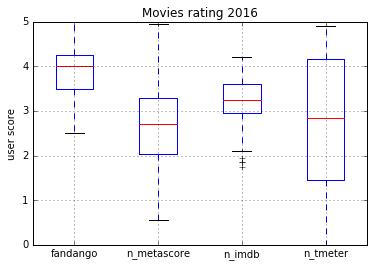

In [19]:
# We are isolating user rating data rfom fandango, metacritics, imdb and tomatometer
# We use these data to create a boxplot
compare_16_user_rating = fandango_compare_2016[['fandango','n_metascore','n_imdb','n_tmeter']]
compare_16_user_rating.boxplot()
plt.title('Movies rating 2016')
plt.ylabel('user score')
plt.show()

This plot shows that in 2016 user rating in fandango are higher than the other sites.

# Rating of popular movies at Fandango in 2015 and 2016

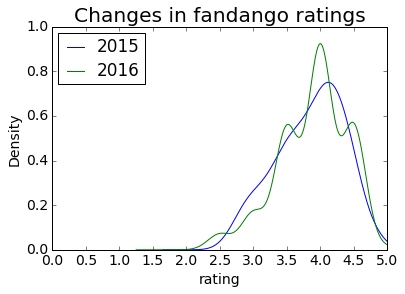

In [20]:
# We are going to use kernel density plot to compare Fandango movie rating in 
# 2015 and 2016
fandango_compare_2015['Fandango_Ratingvalue'].plot.kde(label='2015', legend=True)
fandango_compare_2016['fandango'].plot.kde(label='2016', legend=True)
plt.style.use('fivethirtyeight')
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('rating')
plt.title("Changes in fandango ratings")
plt.show()


This figure shows that ratings in 2016 have changed and were slightly lower 
than 2015.<br/>
These changes confirm the previous observations we had by analysing frequency tables.<br/>
We can look at some statistical parameter to confim these changes.

In [21]:
fandango_compare_2015['Fandango_Ratingvalue'].describe()

count    129.000000
mean       3.846512
std        0.505446
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [22]:
fandango_compare_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [23]:
fandango_compare_2016['fandango'].median()
fandango_compare_2016['fandango'].mean()
fandango_compare_2016['fandango'].mode()

0    4.0
dtype: float64

In [24]:
fandango_stat = pd.DataFrame({'Fandango user rating statistics': ['mean', 'median', 'mode'],
                             '2016':[fandango_compare_2016['fandango'].mean(), fandango_compare_2016['fandango'].median(), 4.0],
                             '2015':[fandango_compare_2015['Fandango_Ratingvalue'].mean(), fandango_compare_2015['Fandango_Ratingvalue'].median(), 4.1]})
fandango_stat

,2015,2016,Fandango user rating statistics
0,3.846512,3.887435,mean
1,3.900000,4.000000,median
2,4.100000,4.000000,mode


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



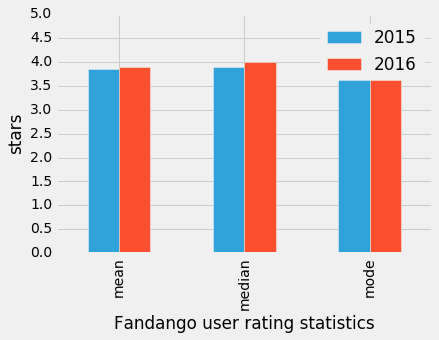

In [25]:
fandango_stat.plot(x="Fandango user rating statistics", y=["2015", "2016"], kind="bar")
plt.ylim(0,5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('stars')
plt.show()